

One of the major problems in license plate recognition system is when a plate number is already faded. This affects the recognition process and may produce incorrect result that may lead to an invalid license plate number or worse a different plate number. This problem can cause a lot of trouble specially on road violations.

### 1. Write your code below

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


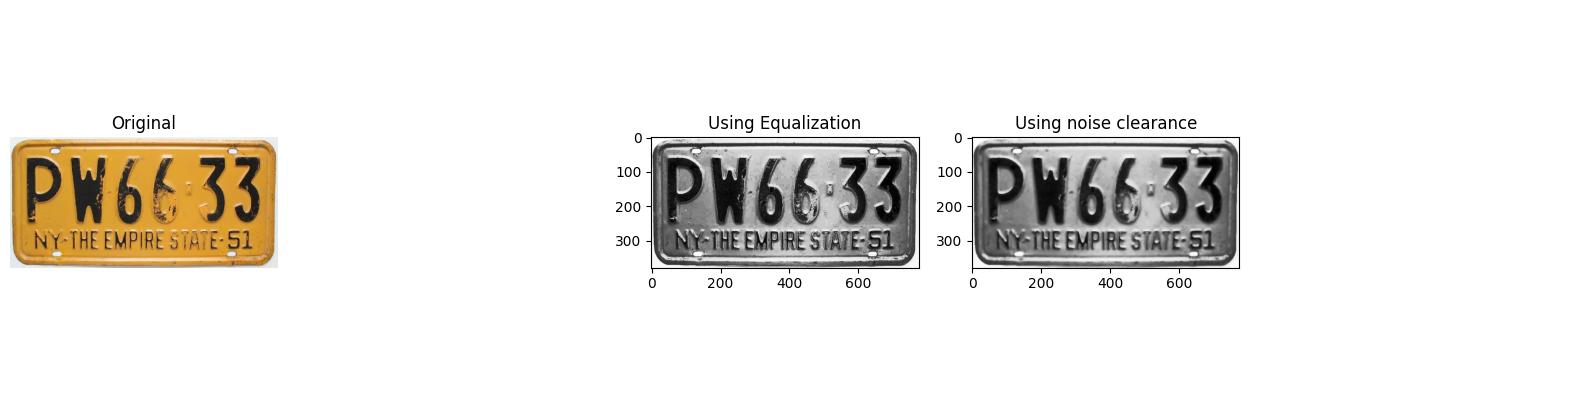

In [5]:

def preprocess_faded_license_plate(image_path):
    
    img = cv2.imread(image_path)

    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    
    equalized = cv2.equalizeHist(gray)

  
    denoised = cv2.bilateralFilter(equalized, 9, 100, 100)

    
    _, thresholded = cv2.threshold(denoised, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    closed = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel)

    
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(20, 5))
    ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax1.set_title('Original')
    ax1.axis('off')
    
    
    ax2.axis('off')
    ax3.imshow(equalized, cmap='gray')
    ax3.set_title('Using Equalization')
    ax3.axis('on')
    ax4.imshow(denoised, cmap='gray')
    ax4.set_title('Using noise clearance')
    ax4.axis('on')
    
    ax5.axis('off')
    plt.show()

image_path = 'plate.jpg'  


preprocess_faded_license_plate(image_path)
